# Project: Investigate Medical Appointment No Shows

## Table of contents
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>    

<a id='Intro'></a>
## Introduction

This dataset collects information from 110527 medical appointments in Brazil from ('2016-04-29') to ('2016-06-08') and it's associated 14 variables.The most important one is if the patient shows up or is a no show for the medical appointment.

The features are as follows:
 + PatientId: Identification of the patient
 
 + AppointmentID: Identification of the appointment

 + Gender: M=>Male & F=>Female.

 + AppointmentDay: The day of Appointment.

 + ScheduledDay: Tells us on what day the patient set up their appointment.

 + Age: Patient's age.

 + Neighborhood: indicates the location of the hospital.

 + Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program

 + Hipertension: True or False

 + Diabetes: True or False

 + Alcoholism: True or False

 + Handcap: handicap rate (0 to 4)

 + SMS_received: True or False.

 + No-show: True or False.

Below are some of the questions that will be investigated in this analysis:
1. Does the day and month of the appointment have any affect on the amount of people who show up and those who do not.
2. Does the number of days one waits for an appointment affect the number of people who show up or not?
3. Does the gender of a person have any indication of whether one shows up or not.
4. Does the age of a person affect their showing up or not showing up.
5. Does the health of a person(whether one has diabetes or hipertension or is handicaped) affect their showing up or not.
6. Whether a person being alcoholic or not influence their showing up or lack thereof.
7. Does getting an SMS or having a scholarship influence a persons showing up or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# loading the dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv',parse_dates=['ScheduledDay','AppointmentDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# having a look at the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

As shown above, there are:
 - 110527 rows and 14 columns
 - 2 datetime columns, 1 float column, 8 int64 column and 3 object columns.
 - No rows that are null. 

In [4]:
# unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [5]:
# checking for duplicated rows
df.duplicated().sum()

0

In [6]:
# summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


conclusions:
- the columns should be converted to lower case and remove  '-' or ' _'  on columns that have them.
- the rows in age column that are less than 0 should be removed.


### Data Cleaning

- Converting all columns to lower case and replacing the _ and -.

In [7]:
df.rename(columns=lambda x: x.lower().replace("-","").replace("_",""),inplace=True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'smsreceived', 'noshow'],
      dtype='object')

- Removing any rows that have ages below 0, since they must be errant entries and creating a new column that define age groups for the ages.

In [8]:
# summary statistics of the age column
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

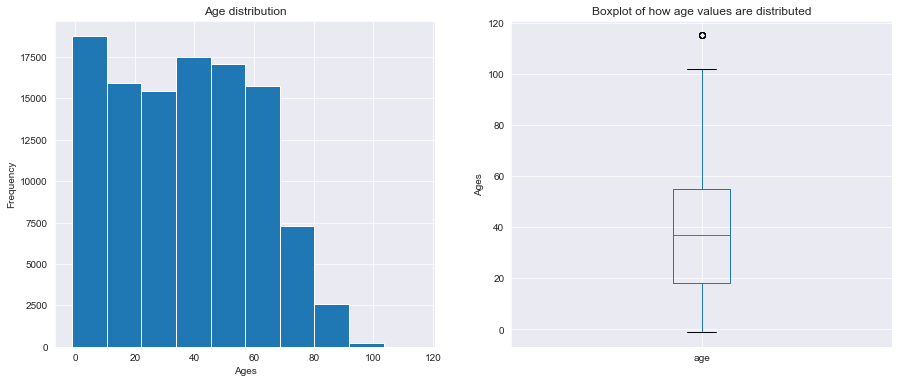

In [9]:
# having a look at the distribution of the age column.
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
df['age'].plot(kind='hist', title='Age distribution')
plt.xlabel('Ages')
plt.subplot(1,2,2)
df['age'].plot(kind='box', title='Boxplot of how age values are distributed')
plt.ylabel('Ages');

In [10]:
# filtering the age column for only rows with values above 0.
df = df.query('age != -1')
df['age'].min()

0

In [11]:
# creating an agegroups column
bins = [0,18,40,60,80,np.inf]
labels = ['0-18','19-40','41-60','61-80','81>']
df['agegroups'] = pd.cut(df['age'],bins,right=False,labels=labels)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,agegroups
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,61-80
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,41-60
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,61-80
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-18
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,41-60


In [12]:
df['agegroups'].unique()

['61-80', '41-60', '0-18', '19-40', '81>']
Categories (5, object): ['0-18' < '19-40' < '41-60' < '61-80' < '81>']

In [13]:
# creating a column to indicate the month of the appointmnet and the day of the appointment.
df['month'] = df['appointmentday'].dt.month_name()
df['day'] = df['appointmentday'].dt.day_name()
df.head(10)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,agegroups,month,day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,61-80,April,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,41-60,April,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,61-80,April,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-18,April,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,41-60,April,Friday
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,61-80,April,Friday
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,19-40,April,Friday
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,19-40,April,Friday
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,19-40,April,Friday
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,19-40,April,Friday


In [14]:
# first and last date of appointment
df['appointmentday'].min(), df['appointmentday'].max()

(Timestamp('2016-04-29 00:00:00+0000', tz='UTC'),
 Timestamp('2016-06-08 00:00:00+0000', tz='UTC'))

In [15]:
# creating a column to show the number of days between scheduling and appointment.
df['waitdays'] = df['appointmentday'] - df['scheduledday']
df.head(20)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,agegroups,month,day,waitdays
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,61-80,April,Friday,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,41-60,April,Friday,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,61-80,April,Friday,-1 days +07:40:56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-18,April,Friday,-1 days +06:30:29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,41-60,April,Friday,-1 days +07:52:37
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,61-80,April,Friday,1 days 15:23:09
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,19-40,April,Friday,1 days 08:54:48
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,19-40,April,Friday,1 days 08:20:02
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,19-40,April,Friday,-1 days +15:57:44
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,19-40,April,Friday,1 days 11:11:35


In [16]:
# cleaning the waitdays column to remain with the number of days only.
df['waitdays'] = df['waitdays'].astype(str)
df['waitdays'] = df['waitdays'].apply(lambda x: x.split()[0]).astype(int)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,agegroups,month,day,waitdays
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,61-80,April,Friday,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,41-60,April,Friday,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,61-80,April,Friday,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-18,April,Friday,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,41-60,April,Friday,-1


In [17]:
df['waitdays'].describe()

count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: waitdays, dtype: float64

In [18]:
# wait days below 0 must have been errant entries, hence rows with wait days less than 0 are removed.
df = df.query('waitdays >= 0')
df['waitdays'].describe()

count    71959.000000
mean        14.642018
std         16.494334
min          0.000000
25%          3.000000
50%          8.000000
75%         21.000000
max        178.000000
Name: waitdays, dtype: float64

Dropping the patientid and appointmentid columns since they will not be used in the analysis.

In [19]:
df.drop(['patientid', 'appointmentid'],axis=1,inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,agegroups,month,day,waitdays
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,61-80,April,Friday,1
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,19-40,April,Friday,1
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,19-40,April,Friday,1
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,19-40,April,Friday,1
10,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,19-40,April,Friday,1


<a id='eda'></a>
## Exploratory Data Analysis


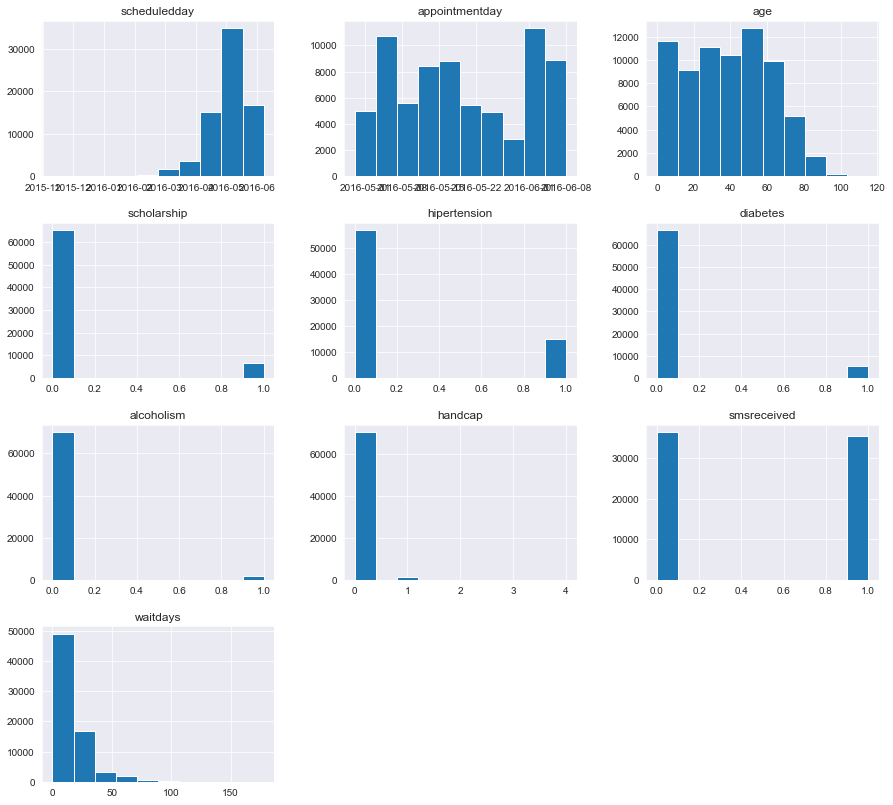

In [20]:
# distribution of individual features.
df.hist(figsize=(15,14));

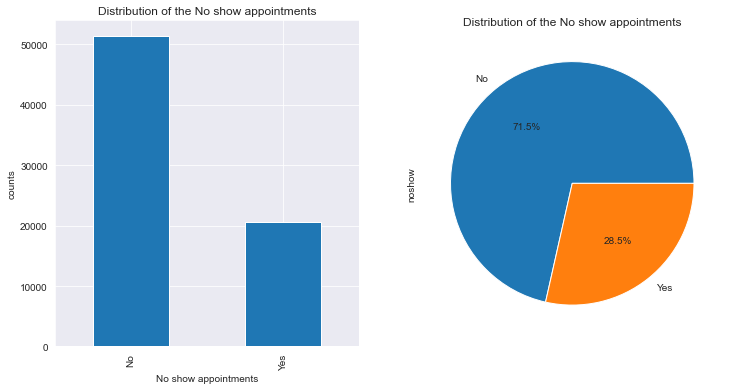

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df['noshow'].value_counts().plot(kind='bar',grid=True)
plt.xlabel('No show appointments')
plt.ylabel('counts')
plt.title('Distribution of the No show appointments')
plt.subplot(1,2,2)
df['noshow'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title('Distribution of the No show appointments');

As shown by the above plots, the distribution of those who were a noshow and those who showed up is uneven.

The percentage of people who scheduled appointments and never showed up is 28.5% while those who actually showed up is 71.5% in this dataset.

In [22]:
# function to be used for the countplots
def countplot(col):
    sns.countplot(x=col, data=df, hue='noshow', palette='flare')

### Q1. Does the day and month of the appointment have any effect on the amount of people who show up and those who do not?

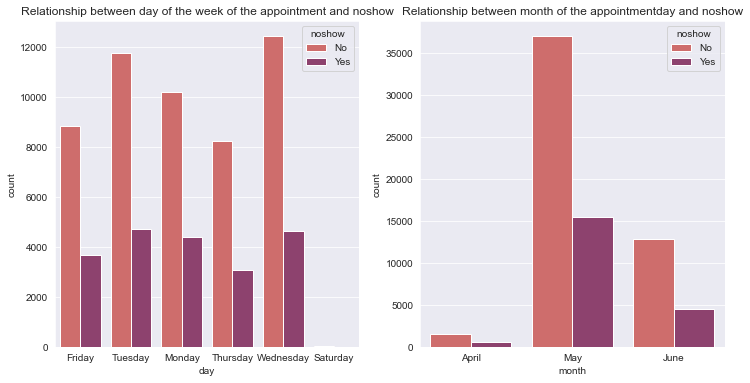

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
countplot('day')
plt.title('Relationship between day of the week of the appointment and noshow')
plt.subplot(1,2,2)
countplot('month')
plt.title('Relationship between month of the appointmentday and noshow');

- Wednesday, Tuesday and Monday had the highest numberof appointments and number of people who showed up.
- Saturday had the least number of appointments, while sunday had no appointments. 
- Saturday is the day with least appointments overall, while no appointment was made on a sunday.
- For the 3 month period within which this data was recorded, April had the least apointments made while May was the month with the highest appointntments.

### Q2. Does the number of days one waits for an appointment affect the number of people who show up or not?

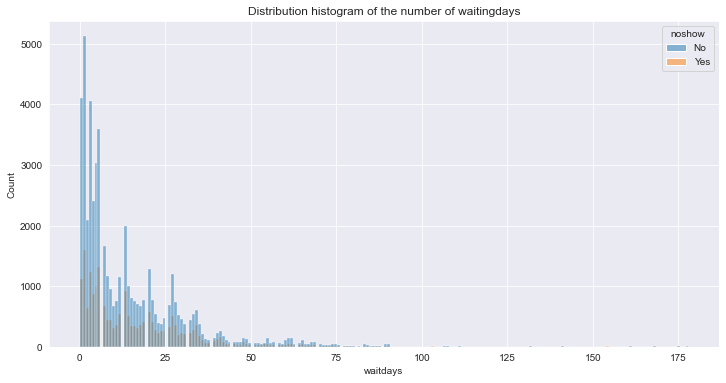

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='waitdays',hue='noshow')
plt.title('Distribution histogram of the number of waitingdays');

- A majority of people  schedule their appointment to be between 0 to 25 days from the time of scheduling.
- Most people who have to wait for les than 25, show up for their appointments.
- The longer the waiting days the lesser the number of appointments.

### Q3. Does the gender of a person have any indication of whether one shows up or not.

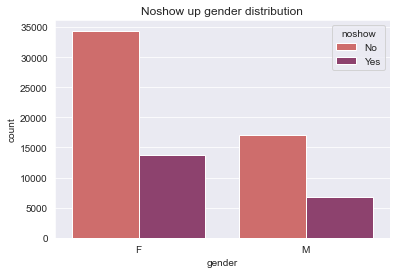

In [25]:
countplot('gender')
plt.title('Noshow up gender distribution');

- More females make appointments than men.
- In both genders, the number of people who made appointments and failed to show up are less than half those who showed up.

### Q4. Does the age of a person affect their showing up or not showing up?

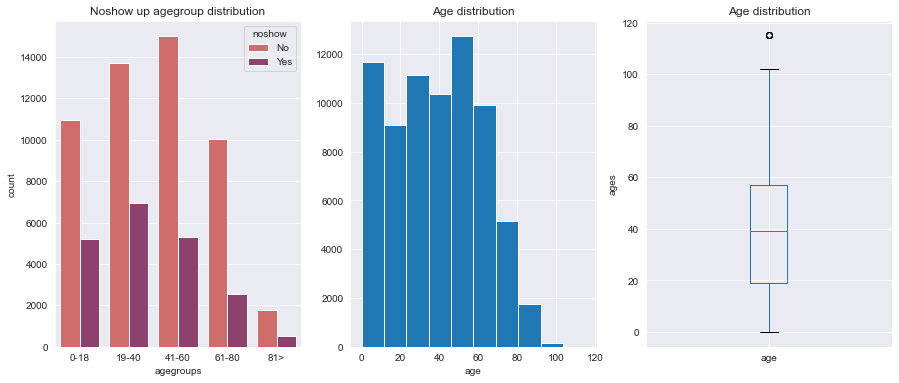

In [26]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
countplot('agegroups')
plt.title('Noshow up agegroup distribution')
plt.subplot(1,3,2)
df['age'].hist();
plt.title('Age distribution')
plt.xlabel('age')
plt.subplot(1,3,3)
df['age'].plot(kind='box',grid=True)
plt.ylabel('ages')
plt.title('Age distribution');

- The bulk of people of the patients who scheduled appointments are between the ages of 0-60 years.
- Patients in the age group of 40-60 years scheduled more apointments, and more than half of them showed up.
- Many patients aged 60 years and above are more likely to show up since the number of those who didn't show up is less than half of those who did.
- The number of patients aged 19-40 years who failed to show up re more than half of those who showed up.

### Q5. Does the health of a person(whether one has diabetes or hipertension or is handicaped) affect their showing up or not?

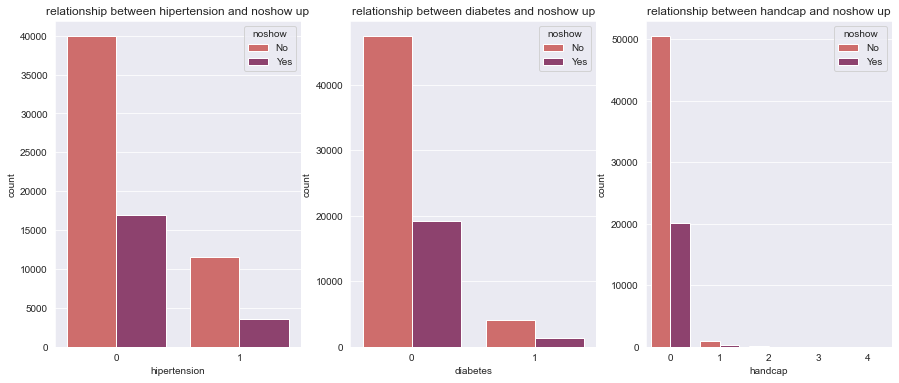

In [27]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
countplot('hipertension')
plt.title('relationship between hipertension and noshow up')
plt.subplot(1,3,2)
countplot('diabetes')
plt.title('relationship between diabetes and noshow up')
plt.subplot(1,3,3)
countplot('handcap')
plt.title('relationship between handcap and noshow up');

- From the above charts, it is clear that people with no helath conditions showed up more than those with the health conditions.
- The people with medcial conditions and showed up are more than those with medical conditions who did not show up.
- This could indicate that having a medical conditions is has little to no influence in showing up or not showing up.


### Q6. Whether a person being alcoholic or not influence their showing up or lack thereof?

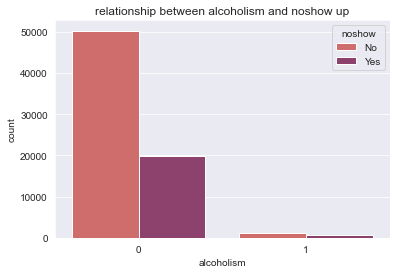

In [28]:
countplot('alcoholism')
plt.title('relationship between alcoholism and noshow up');

- The number of people with alcoholism who scheduled appointments is very small in comparison to those with no alcholism.
- As such it is likley that alcoholism does not affect those who show up and thos who do not.

### Q7. Does getting an SMS or having a scholarship influence a persons showing up or not?

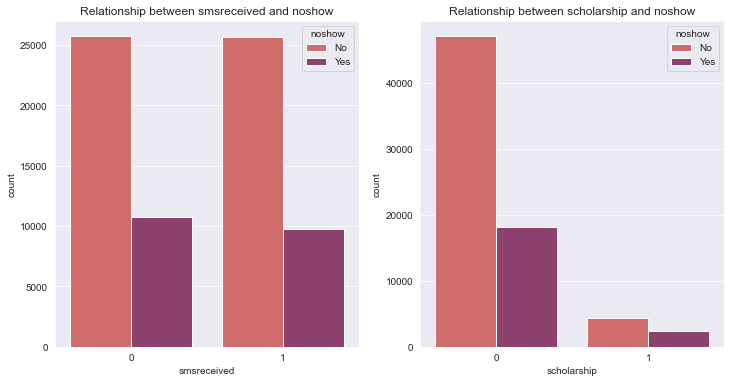

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
countplot('smsreceived')
plt.title('Relationship between smsreceived and noshow')
plt.subplot(1,2,2)
countplot('scholarship')
plt.title('Relationship between scholarship and noshow');

- Getting an sms seems to have no influence over showing up or not.
- This is because the number of those who got an sms and showed up is similar to the number of never received an sms and still showed up.
- It is not clear whether having a scholarship has any influence over showing up or not since the available data is heavily imblanced.

<a id='conclusions'></a>
## Conclusions

The following conclusions can be drawn from the analysis done:

- The datasets is imbalanced with 71.5% people showing up for appointmenet while only 28.5% did not show up.
- Wednesday, Tuesday and Monday had the highest number of appointments. 
- The number of scheduled appointments on saturday are very samll while there are none for sunday, could indicated that most people tend to favor weekdays to make an appointment.
- A majority of people schedule their appointment to be between 0 to 25 days from the time of scheduling.
- The longer the waiting days the lesser the number of appointments.
- Persons aged between 0-40 years tend to show up more for the appointments overall.
- Getting an sms seems to have no influence over showing up or not.

- The main limitation in this dataset is the heavy imbalance, which makes it hard to draw reliable conclusions with regards to the relatioship between some of the features and the noshow column.